<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-6/blob/main/PruebaModeloRioja2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install semtorch

     |████████████████████████████████| 51kB 2.0MB/s 
     |████████████████████████████████| 29.2MB 186kB/s 
     |████████████████████████████████| 204kB 48.1MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
  Created wheel for semtorch: filename=SemTorch-0.1.1-cp37-none-any.whl size=50551 sha256=bf3fd4d2bba3c1d56eb26fab3f7c0cab9b5b1d08c7105f423b3548cec10e8e5b
  Stored in directory: /root/.cache/pip/wheels/f6/da/9f/726f9d2f054d71afa59afeca3f4672464001e9e3f2924d959e
Successfully built semtorch
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)


In [ ]:
from fastai.basics import *
from fastai.vision import models
from fastai.vision.all import *
from fastai.metrics import *
from fastai.data.all import *
from fastai.callback import *


from pathlib import Path
import random
from semtorch import get_segmentation_learner

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
!wget https://www.dropbox.com/s/wtjkuk2t9zrhdin/dataset_final.zip?dl=0 -O dataset.zip

--2021-05-30 14:40:19--  https://www.dropbox.com/s/wtjkuk2t9zrhdin/dataset_final.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wtjkuk2t9zrhdin/dataset_final.zip [following]
--2021-05-30 14:40:19--  https://www.dropbox.com/s/raw/wtjkuk2t9zrhdin/dataset_final.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc573f688f74f63d2cfe24b412c0.dl.dropboxusercontent.com/cd/0/inline/BPeyt3LyET-6zDBvJH1cotp5KTteB1FH9gw9xnG3G1J6lSApH7H86y4H2IA4kASDkH_EKry1d92uP5Vykmq1AWBaOB1dZuMMQDI3enaZdrYj86kBms_V5qjXhxIaDfre6WixNhGjWS0QaJniHDNdXWo9/file# [following]
--2021-05-30 14:40:20--  https://uc573f688f74f63d2cfe24b412c0.dl.dropboxusercontent.com/cd/0/inline/BPeyt3LyET-6zDBvJH1cotp5KTteB1FH9gw9xnG3G1J6lSApH7H86y4H2IA4kASDkH_EKr

Dataset como el anterior pero con las imagenes de la carpeta test diferentes.

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset_prueba_RIOJA/
 extracting: dataset_prueba_RIOJA/codes.txt  
   creating: dataset_prueba_RIOJA/Images/
   creating: dataset_prueba_RIOJA/Images/test/
   creating: dataset_prueba_RIOJA/Images/train/
  inflating: dataset_prueba_RIOJA/Images/train/22678915_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678930_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678945_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678960_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678975_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22678990_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22679005_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/train/22679020_15.tiff  
   creating: dataset_prueba_RIOJA/Images/val/
  inflating: dataset_prueba_RIOJA/Images/val/22978945_15.tiff  
  inflating: dataset_prueba_RIOJA/Images/val/23429155_15.tiff  
   creating: dataset_prueba_RIOJA/Labels/
   creating: dat

In [ ]:
path=Path('dataset_prueba_RIOJA/')

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
imagen = cv2.imread('dataset_prueba_RIOJA/Images/test/foto3.jpg', cv2.IMREAD_UNCHANGED)
imagen.shape

(1500, 1500, 3)

In [ ]:
import os

def recortar_en_trozos(imagen_ruta, altoyancho):
  imagen = cv2.imread(imagen_ruta)
  nombre = imagen_ruta.split('/')[3]
  carpeta2 = imagen_ruta.split('/')[2]
  carpeta1 = imagen_ruta.split('/')[1]
  extension = nombre.split('.')
  ancho = altoyancho
  alto = altoyancho
  i = 0
  for y in range(0,1500,300):
    for x in range(0,1500,300):
      i = i + 1
      recorte = imagen[y:y+altoyancho, x:x+altoyancho]
      cv2.imwrite('dataset_prueba_RIOJA/'+ carpeta1 + '/' + carpeta2 +'/' + extension[0] + '_' + str(i) + '.'+ extension[1], recorte)
  
  os.remove(imagen_ruta)

In [ ]:
recortar_en_trozos('dataset_prueba_RIOJA/Images/test/foto3.jpg', 300)

In [ ]:
path_images = path/"Images"

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [ ]:
testDB = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=partial(get_image_files,folders=['test']),
                   item_tfms=[Resize((300,300))],
                   batch_tfms=Normalize.from_stats(*imagenet_stats)
                  )

In [ ]:
bs = 4
testDLS = testDB.dataloaders(path_images,bs=bs)

In [ ]:
!wget https://www.dropbox.com/s/plytu2dsv0nzf5m/models.zip?dl=0 -O models.zip

--2021-05-30 14:40:24--  https://www.dropbox.com/s/plytu2dsv0nzf5m/models.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/plytu2dsv0nzf5m/models.zip [following]
--2021-05-30 14:40:24--  https://www.dropbox.com/s/raw/plytu2dsv0nzf5m/models.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7f248c3655ed5ff8ab2ec7ebff.dl.dropboxusercontent.com/cd/0/inline/BPcGRgW4RPJoqEcrBOZyO2pJMgvVk-XYkBvQ1NWPb1yFgOzboSKm4AT09gQ5MueFjC3v52aU9qPKm6pOmyxaObYFn_yCjvrvg-ri3B2jL19s6kEqDzn3m3g8bTPX4tOyDF-R1IoKM8sFanybwRgIk2CM/file# [following]
--2021-05-30 14:40:25--  https://uc7f248c3655ed5ff8ab2ec7ebff.dl.dropboxusercontent.com/cd/0/inline/BPcGRgW4RPJoqEcrBOZyO2pJMgvVk-XYkBvQ1NWPb1yFgOzboSKm4AT09gQ5MueFjC3v52aU9qPKm6pOmyxaObYFn_y

In [ ]:
!unzip models.zip

Archive:  models.zip
   creating: models/
  inflating: models/hrnet.pth        


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
learn = get_segmentation_learner(dls=testDLS,number_classes=2,segmentation_type='Semantic Segmentation',
                                 architecture_name='hrnet',backbone_name='hrnet_w30',
                                 metrics=[Dice(),JaccardCoeff()],pretrained=True).to_fp16()

147942KB [00:06, 21769.36KB/s]                            
/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


Cargamos el modelo entrenado anteriormente.

In [ ]:
learn.load('hrnet')

In [ ]:
fnames = get_image_files(path_images/'test')

# Prueba con imagen de Logroño

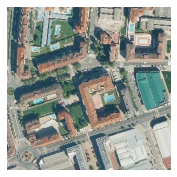

In [ ]:
dl = learn.dls.test_dl(fnames[1:2])
dl.show_batch()

In [ ]:
preds = learn.get_preds(dl=dl)

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:
preds[0].shape

torch.Size([1, 2, 300, 300])

In [ ]:
preds_1 = preds[0][0]

In [ ]:
preds_1

TensorImage([[[0.9917, 0.9917, 0.9913,  ..., 0.8448, 0.8353, 0.8353],
         [0.9917, 0.9917, 0.9913,  ..., 0.8448, 0.8353, 0.8353],
         [0.9912, 0.9912, 0.9908,  ..., 0.8448, 0.8366, 0.8366],
         ...,
         [0.9470, 0.9470, 0.9448,  ..., 0.9029, 0.9017, 0.9017],
         [0.9452, 0.9452, 0.9418,  ..., 0.9137, 0.9122, 0.9122],
         [0.9452, 0.9452, 0.9418,  ..., 0.9137, 0.9122, 0.9122]],

        [[0.0083, 0.0083, 0.0087,  ..., 0.1552, 0.1647, 0.1647],
         [0.0083, 0.0083, 0.0087,  ..., 0.1552, 0.1647, 0.1647],
         [0.0088, 0.0088, 0.0092,  ..., 0.1552, 0.1634, 0.1634],
         ...,
         [0.0530, 0.0530, 0.0552,  ..., 0.0971, 0.0983, 0.0983],
         [0.0548, 0.0548, 0.0582,  ..., 0.0863, 0.0878, 0.0878],
         [0.0548, 0.0548, 0.0582,  ..., 0.0863, 0.0878, 0.0878]]])

In [ ]:
preds_arx = (preds_1).argmax(dim=0)

In [ ]:
np.unique(preds_arx)

array([0, 1])

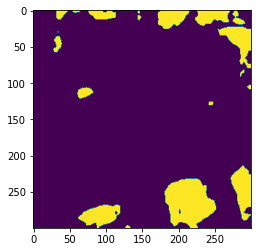

In [ ]:
plt.imshow(preds_arx)

# Prueba con imagen de Massachusetts 

Imagen sacada del dataset facilitado, no usada para entrenar.

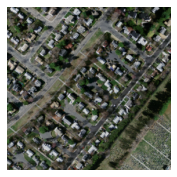

In [ ]:
dl = learn.dls.test_dl(fnames[11:12])
dl.show_batch()

In [ ]:
preds = learn.get_preds(dl=dl)

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [ ]:
preds_1 = preds[0][0]

In [ ]:
preds_arx = (preds_1).argmax(dim=0)

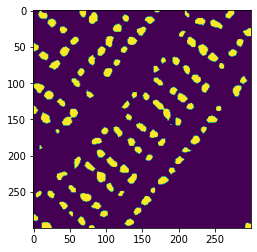

In [ ]:
plt.imshow(preds_arx)